Ch 8 Régression linéaire multiple

35 De régression linéaire à multiple

Dans la régression linéaire simple, nous cherchons à optimiser l'erreur quadratique moyenne lors de l'estimation d'une variable dépendante (petale_width) par une variable indépendante (petale_length). 

36 Equation

Y = b + S(Wi * Xk,i)

pour i allant de 1 à n

Ici, chaque index i représente une variable différente de même indice k.

37 Implémentation: équation

In [62]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline

Ici X contient l'indexe k des variables 1 à 4.
(Dénommées ainsi par leur ordre d'apparition dans la variable X)

In [2]:
X = (np.linspace(1, 6, 6, dtype=int))
X = X[(X != 3) & (X != 4)]
W = 4*[1]
b =2

In [3]:
S = 0
for xi, wi in zip(X, W):
    S += xi * wi

y = b + S
y

np.int64(16)

38 Visualisation: cas à 2 caractéristiques

In [4]:
def lin_reg(b, W, X):
    S = 0
    for xi, wi in zip(X, W):
        S += xi * wi
        y = b + S
    return y

In [5]:
b= 4
W = [5,2]
X = [1,1]
y = lin_reg(b, W, X)

y

11

Ici k est l'indice au sein des variables et i de Xi le numéro de la variable.

Autrement dit ce code calcule Y pour les vecteurs X1 et X2 de longeur 10.

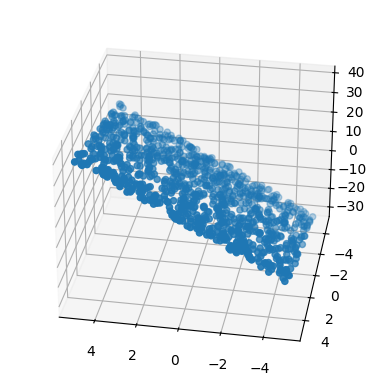

In [6]:
import random
import matplotlib.pyplot as plt
%matplotlib inline

b = 4
W =[5, 2]
X1 = []
X2 = []
Y  = []

for k in range(1000):
    x1 = random.uniform(-5, 5)
    x2 = random.uniform(-5, 5)
    X = [x1, x2]
    y = lin_reg(b, W, X)
    X1.append(x1)
    X2.append(x2)
    Y.append(y)

ax = plt.axes(projection='3d')
ax.view_init(30, 100) #Changement d'angle
ax.scatter3D(X1, X2, Y)
plt.show()

Pour visualiser une Y et une variable l'on emploit une droite.

Pour Y et 2 variables, un plan comme ici présent.

Pour plus de 2 variables, un hyperplan.

39 Présentation du dataset: Boston housing dataset

Prédire le prix de vente des maisons dans le quartier de Boston.

13 caractéristiques

506 exemples

Dispo dans sklearn

Ou via le site:
[Boston housing dataset](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html)

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#from sklearn.datasets import load_boston
#dataset.keys()
#dataset.target

#This is the way to proceed with sklearn but boston dataset no more available


    CRIM - per capita crime rate by town
    ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
    INDUS - proportion of non-retail business acres per town.
    CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
    NOX - nitric oxides concentration (parts per 10 million)
    RM - average number of rooms per dwelling
    AGE - proportion of owner-occupied units built prior to 1940
    DIS - weighted distances to five Boston employment centres
    RAD - index of accessibility to radial highways
    TAX - full-value property-tax rate per $10,000
    PTRATIO - pupil-teacher ratio by town
    B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    LSTAT - % lower status of the population
    MEDV - Median value of owner-occupied homes in $1000's

In [8]:
#Downloaded on Kaggle
df = pd.read_csv('Boston.csv')

df.columns
df.drop(['Unnamed: 0'], axis =1)


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


42 Exploration - Partie 2

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   crim        506 non-null    float64
 2   zn          506 non-null    float64
 3   indus       506 non-null    float64
 4   chas        506 non-null    int64  
 5   nox         506 non-null    float64
 6   rm          506 non-null    float64
 7   age         506 non-null    float64
 8   dis         506 non-null    float64
 9   rad         506 non-null    int64  
 10  tax         506 non-null    int64  
 11  ptratio     506 non-null    float64
 12  black       506 non-null    float64
 13  lstat       506 non-null    float64
 14  medv        506 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 59.4 KB


Pas de valeur manquante.

Nous allons nous concentrer sur les variable Lstat et rm pour déterminer le prix de vente médiant d'une maison (medv).

Ces variables ont été choisies par des test préalables.

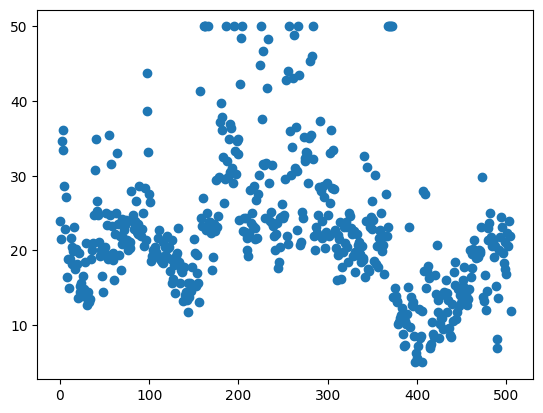

In [10]:
plt.plot(df['medv'], 'o')
plt.show()

mdve a été artificiellement seuillé à 50 000 ce qui peut biaiser nos modèles.
Nous pouvons donc nous en débarrasser.

In [11]:
df = df[df['medv']!=50]

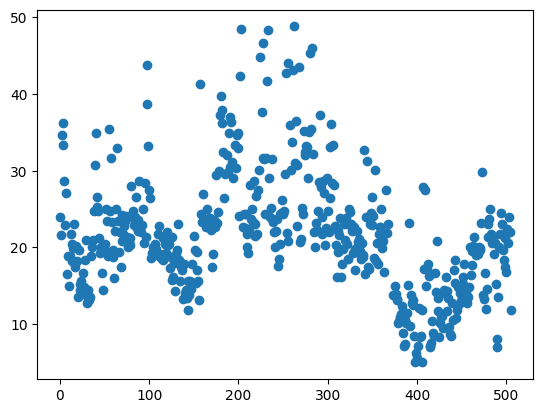

In [12]:
plt.plot(df['medv'], 'o')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

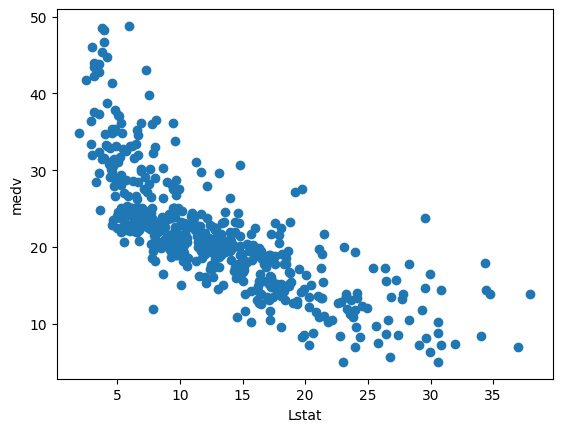

In [13]:
plt.plot(df.lstat, df.medv, 'o')
plt.xlabel('Lstat')
plt.ylabel('medv')
plt.show

On voit qu'il existe une relation négative entre Lstat le pourcentage de classe populaire et mdev.

<function matplotlib.pyplot.show(close=None, block=None)>

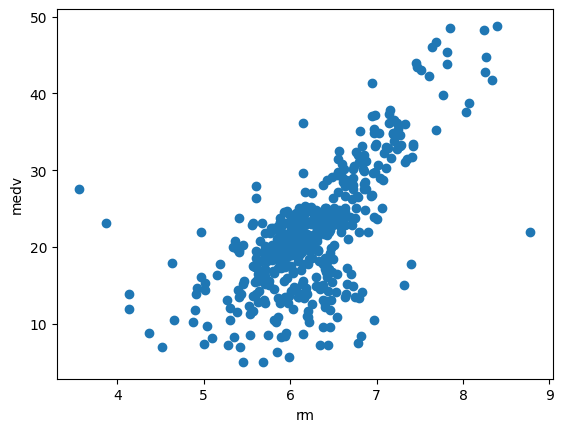

In [14]:
plt.plot(df.rm, df.medv, 'o')
plt.xlabel('rm')
plt.ylabel('medv')
plt.show

Il existe une relation positive entre le mdev et rm le nombre de chambres par logement.

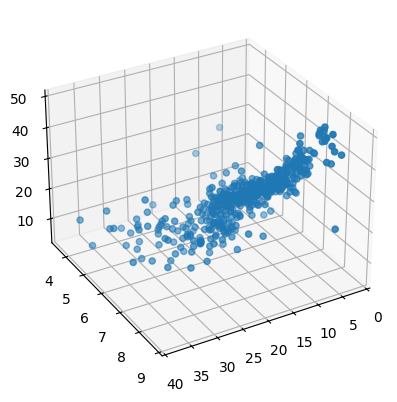

In [15]:
ax = plt.axes(projection='3d')
ax.view_init(30, 60)
ax.scatter3D(df.lstat, df.rm, df.medv)
plt.show()

43 Implémentation: modèle prédictif

In [83]:
#X0
lstat = df.lstat.values

#X1
rm = df.rm.values

#Y
medv  = df.medv.values

Rappel du ch6-7 et +:

W <=> bi pour i € R+*.
b0 étant l'intercept ici écrit b pour plus de distinction.

La solution a l'équation: (no idea for multiple linear regression)
y = b + w * x

est 

b = ym - w * xm 

où ym et xm sont les moyennes respectives d'y et x

et w calculé par

[S(xi-xm)(yi-ym)]/S(xi-xm)²

In [87]:
def intercept(Y_mean, Weights, X_Means):
    Somme = 0
    for Wi, Xi_m in zip(Weights, X_Means):
       Somme += Wi * Xi_m
    b = Y_mean - Somme
    return b

def weight(Xi, Y, Xi_mean, Y_mean):
    w_num = 0
    w_den = 0
    for xi, yi in zip(Xi, Y):
        w_num += (xi - Xi_mean) * (y - Y_mean)
        w_den += (xi - Xi_mean)**2
    w = w_num/w_den
    return w 

def weights_and_means(X, Y):
    Y_mean  = np.mean(Y)
    X_Means = []
    Weights = []
    for i in range(0, len(X)):
        X_Means.append(np.mean(X[i]))
        Weights.append(weight(X[i], Y, X_Means[i], Y_mean))
    WeightsAndMeans = [Y_mean, X_Means, Weights]
    return WeightsAndMeans
        
def lin_reg_multiple(X, Y):
    Y_mean  = weights_and_means(X, Y)[0]
    print(f'Y mean : {Y_mean}')
    X_Means = weights_and_means(X, Y)[1]
    print(f'X_Means : {X_Means}')
    Weights = weights_and_means(X, Y)[2]
    print(f'Coef : {Weights}')
    b = intercept(Y_mean, Weights, X_Means)
    print(f'Biais : {b}')
    Predicted_Y = []
    for x0, x1 in zip (X[0], X[1]):
        predicted_y = x0 * Weights[0] + x1 * Weights[1] - b
        Predicted_Y.append(predicted_y)
    return Predicted_Y


X = [lstat, rm]
Y = medv

Predicted_Y = lin_reg_multiple(X, Y)

Y mean : 22.532806324110677
X_Means : [np.float64(12.653063241106722), np.float64(6.284634387351779)]
Coef : [np.float64(1.4021934639273834e-15), np.float64(3.4700066842266295e-15)]
Biais : 22.532806324110638


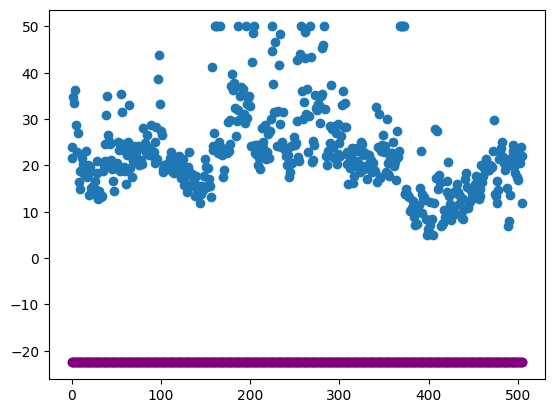

In [88]:
plt.plot(Predicted_Y, 'o', color = 'purple')
plt.plot(Y, 'o')

#Doesn't match
#sklearn find those results 
#Coefs [ 5.09478798 -0.64235833]
#Biais -1.358272811874489

In [61]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(Y, Predicted_Y)
mse
#What did I do ':) ???

np.float64(6145.17549197114)

44 Implementation scikit-learn

In [63]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline

In [65]:
df = pd.read_csv('Boston.csv')
df.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Pour utiliser sklearn, nous devons tout d'abord convertir les variables de prédiction et la variable dépendante dans un numpy array.

In [90]:
X = df[['rm', 'lstat']].values
Y = df['medv'].values
X
Y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

Nous pouvous désormais employer la méthode LinearRegression du sous module linear_model de sklearn.

In [69]:
#Assignation du modèle qui adaptera le modèle en fonction
#du nombre de X
modele = linear_model.LinearRegression()

#Apprentissage
modele.fit(X, Y)


LinearRegression()

In [71]:
print("Coefs", modele.coef_)
print("Biais", modele.intercept_)

Coefs [ 5.09478798 -0.64235833]
Biais -1.358272811874489


In [91]:
Y_pred = modele.predict(X)

print("prix : ", Y[:10])
print("Predictions : ", Y_pred[:10])

prix :  [24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9]
Predictions :  [28.94101368 25.48420566 32.65907477 32.40652    31.63040699 28.05452701
 21.28707846 17.78559653  8.10469338 18.24650673]


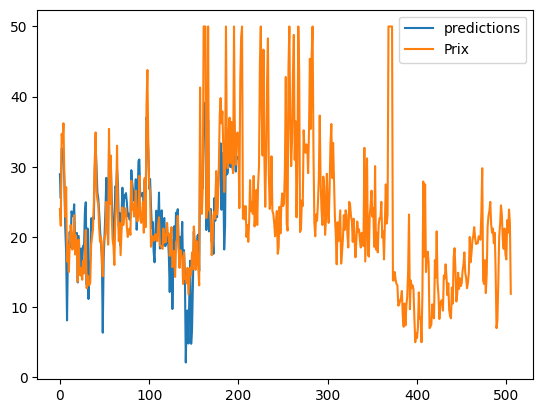

In [94]:
N = 200
plt.plot(Y_pred[:N], label = 'predictions')
plt.plot(Y, label = 'Prix')
plt.legend()
plt.show()

In [96]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y, Y_pred)

#La relation des données n'est pas tout à fait linéaire, ce qui explique ce résultat
mse

np.float64(30.51246877729947)